In [30]:
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt_tab')

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [34]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
df.columns = ['labels', 'text']

In [36]:
df.head(10)

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [37]:
df['labels'].value_counts()

,count
labels,
ham,4825
spam,747


In [38]:
df['labels'] = df['labels'].map({'ham': 0, 'spam': 1})
df

,labels,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [39]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [40]:
def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Remove extra white space from text

    text = re.sub(r'\W', ' ', str(text)) # Remove all the special characters from text

    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Remove all single characters from text

    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any character that isn't alphabetical

    text = text.lower()

    words = nltk.word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]

    Words = [word for word in Words if len(word) > 3]


    indices = np.unique(Words, return_index=True)[1]
    cleaned_text = np.array(Words)[np.sort(indices)].tolist()



    return cleaned_text

In [41]:
x = df.drop('labels', axis=1)
y = df['labels']

In [42]:
texts = list(x['text'])
cleaned_text = [process_text(text) for text in texts]

In [43]:
x = [' '.join(words) for words in cleaned_text]

In [44]:
x

['jurong point crazy available bugis great world buffet cine amore',
 'joking',
 'free entry wkly comp final tkts text receive question rate apply',
 'early already',
 'think life around though',
 'freemsg darling week word back like still chgs send',
 'even brother like speak treat patent',
 'request melle minnaminunginte nurungu vettam callertune caller press copy friend',
 'winner valued network customer selected receivea prize reward claim call code valid hour',
 'mobile month entitled update latest colour camera free call',
 'home soon want talk stuff anymore tonight cried enough today',
 'chance cash pound send cost tsandcs apply reply info',
 'urgent week free membership prize jackpot word claim dbuk lccltd pobox ldnwarw',
 'searching right word thank breather promise wont take help granted fulfil wonderful blessing time',
 'date sunday',
 'xxxmobilemovieclub credit click link next message http qjkgighjjgcbl',
 'watching',
 'remember spell name naughty make',
 'fine thats feel g

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
x_train

['exact intention',
 '',
 'waaaat lololo next time',
 'free video camera phone half price line rental mths cross ntwk txts call mobileupd calloptout',
 'tick could loneliness know pout stomp foot need',
 'tone club expired reply monoc mono polyc polys weekly week stop free stream',
 'please text anymore nothing else',
 'find aunt nike',
 'bruce fowler park long story',
 'missing pray inshah allah',
 'tell call claim prize enter mobile personal detail prompt careful',
 'standing',
 'somebody website play hold using online spacebucks',
 'cant keep talking people sure agree price tell want really much willing',
 'significant dont worry',
 'lasting much hour might lucky',
 'want kiss feel next',
 'haha awesome back',
 'congratulation awarded voucher gift guaranteed free entry wkly draw music',
 'england macedonia dont miss goal team news national wale scotland poboxoxwwq',
 'make sure train worc foregate street shrub hill night',
 'missed call cause yelling scrappy miss wait come home lone

In [ ]:
# # Bag Of Word
# from sklearn.feature_extraction.text import CountVectorizer

# count_vectorizer = CountVectorizer(max_features=6000)
# x_train_bow = count_vectorizer.fit_transform(x_train)
# x_test_bow = count_vectorizer.transform(x_test)

# x_train_bow = x_train_bow.toarray()
# x_test_bow = x_test_bow.toarray()

# features_names = count_vectorizer.get_feature_names_out()

# clean_text = pd.DataFrame(x_train_bow, columns=features_names)

# print("Bag of Words matrix shape:", clean_text.shape)


In [ ]:
# # TF-IDF
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf = TfidfVectorizer(max_features=6000)
# x_train_tfidf = tfidf.fit_transform(x_train)
# x_test_tfidf = tfidf.transform(x_test)

# x_train_tfidf = x_train_tfidf.toarray()
# x_test_tfidf = x_test_tfidf.toarray()

# features_names = tfidf.get_feature_names_out()

# clean_text = pd.DataFrame(x_train_tfidf, columns=features_names)

# print("TF-IDF matrix shape:", clean_text.shape)

In [47]:
x

['jurong point crazy available bugis great world buffet cine amore',
 'joking',
 'free entry wkly comp final tkts text receive question rate apply',
 'early already',
 'think life around though',
 'freemsg darling week word back like still chgs send',
 'even brother like speak treat patent',
 'request melle minnaminunginte nurungu vettam callertune caller press copy friend',
 'winner valued network customer selected receivea prize reward claim call code valid hour',
 'mobile month entitled update latest colour camera free call',
 'home soon want talk stuff anymore tonight cried enough today',
 'chance cash pound send cost tsandcs apply reply info',
 'urgent week free membership prize jackpot word claim dbuk lccltd pobox ldnwarw',
 'searching right word thank breather promise wont take help granted fulfil wonderful blessing time',
 'date sunday',
 'xxxmobilemovieclub credit click link next message http qjkgighjjgcbl',
 'watching',
 'remember spell name naughty make',
 'fine thats feel g

In [48]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)


In [49]:
x_train.shape

(4135, 100)

In [50]:
x_test.shape

(1034, 100)

In [51]:
y_train.shape

(4135,)

In [52]:
y_test.shape

(1034,)

# **RNN**

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

model = Sequential()

model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=100))

model.add(SimpleRNN(units=128, return_sequences=True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=64))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [55]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32, callbacks=[early_stopping])

Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - accuracy: 0.8691 - loss: 0.3230 - val_accuracy: 0.9671 - val_loss: 0.0971
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.9808 - loss: 0.0640 - val_accuracy: 0.9729 - val_loss: 0.0774
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.9974 - loss: 0.0136 - val_accuracy: 0.9739 - val_loss: 0.0924
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.9983 - loss: 0.0069 - val_accuracy: 0.9739 - val_loss: 0.1029
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.9975 - loss: 0.0115 - val_accuracy: 0.9758 - val_loss: 0.1053


In [56]:
model.evaluate(x_test, y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9744 - loss: 0.0736


[0.07736597210168839, 0.9729207158088684]

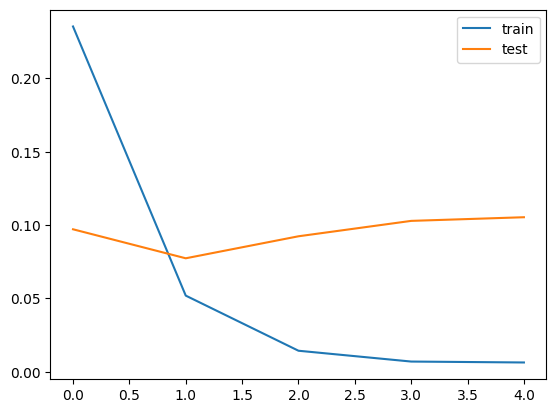

In [57]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# **GRU**

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU

model = Sequential()

model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=100))

model.add(GRU(units=128, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=64))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32, callbacks=[early_stopping])


Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 30s 197ms/step - accuracy: 0.8997 - loss: 0.2845 - val_accuracy: 0.9700 - val_loss: 0.0855
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 25s 194ms/step - accuracy: 0.9891 - loss: 0.0438 - val_accuracy: 0.9739 - val_loss: 0.0827
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 41s 197ms/step - accuracy: 0.9952 - loss: 0.0151 - val_accuracy: 0.9758 - val_loss: 0.1020
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 40s 189ms/step - accuracy: 0.9985 - loss: 0.0069 - val_accuracy: 0.9749 - val_loss: 0.1160
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 25s 189ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9778 - val_loss: 0.1286


In [59]:
model.evaluate(x_test, y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9790 - loss: 0.0698


[0.0826924741268158, 0.9738878011703491]

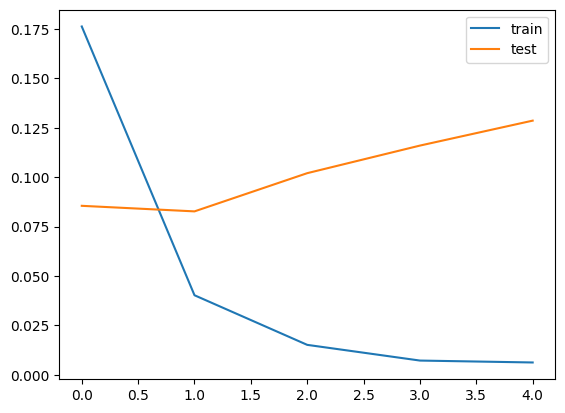

In [60]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# **LSTM**

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()

model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=100))

model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32, callbacks=[early_stopping])

Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - accuracy: 0.8749 - loss: 0.3179 - val_accuracy: 0.9720 - val_loss: 0.0880
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 29s 221ms/step - accuracy: 0.9843 - loss: 0.0629 - val_accuracy: 0.9758 - val_loss: 0.0781
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 29s 224ms/step - accuracy: 0.9943 - loss: 0.0258 - val_accuracy: 0.9662 - val_loss: 0.1022
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 28s 216ms/step - accuracy: 0.9980 - loss: 0.0138 - val_accuracy: 0.9797 - val_loss: 0.1009
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 28s 214ms/step - accuracy: 0.9985 - loss: 0.0069 - val_accuracy: 0.9584 - val_loss: 0.1417


In [62]:
model.evaluate(x_test, y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9796 - loss: 0.0724


[0.0781416967511177, 0.9758220314979553]

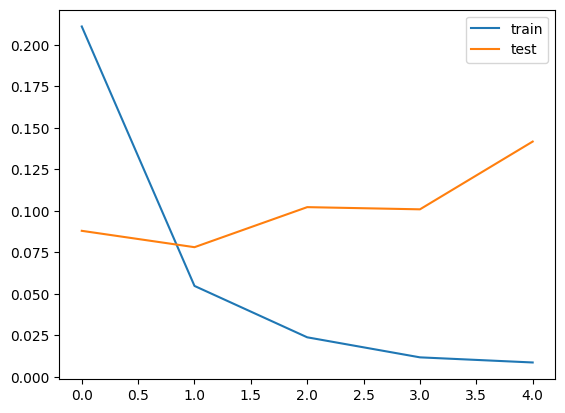

In [63]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()